In [2]:
import matplotlib.pyplot as plt
import numpy as np
import OOPAO

import tomoAO
tomoAO.__version__

ao_mode = "MLAO"

config_dir = "/home/joaomonteiro/Desktop/OOPAO_ast/tutorials/"
config_file = "config.ini"

# Loading the config
config_vars = tomoAO.IO.load_from_ini(config_file, ao_mode=ao_mode,config_dir=config_dir)

In [3]:
from OOPAO.Source import Source
from OOPAO.Asterism import Asterism

optBand = config_vars["lgs_opticalBand"]
magnitude = config_vars["lgs_magnitude"]
lgs_zenith = config_vars["lgs_zenith"]
lgs_azimuth = config_vars["lgs_azimuth"]
lgs_altitude = config_vars["lgs_altitude"]

n_lgs = config_vars["n_lgs"]

lgsAst = Asterism([Source(optBand=optBand,
              magnitude=magnitude,
              coordinates=[lgs_zenith[kLgs], lgs_azimuth[kLgs]],
            altitude=lgs_altitude)
          for kLgs in range(n_lgs)])



ngs = Source(magnitude = config_vars["lgs_magnitude"],
             optBand   = config_vars["lgs_opticalBand"],
             altitude= config_vars["lgs_altitude"])


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |90000.00 
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------


--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  5.9e-07   |  0.00  |  0.00   | 90000.00 |   0.00    |  9.0e+09  |
----------------------------------------------------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |90000.00 
Magnitude                |  0.00   
F


------------ Telescope -------------
Diameter [m]             |   8.00   
Resolution [px]          |   160    
Pixel size [m]           |   0.05   
Surface [m²]             |   0.05   
Central obstruction [%]  |    10    
Pixels in pupil          |  19900   
Field of view [arcsec]   |   0.00   
------------------------------------


------------ Telescope -------------
Diameter [m]             |   8.00   
Resolution [px]          |   160    
Pixel size [m]           |   0.05   
Surface [m²]             |   0.05   
Central obstruction [%]  |    10    
Pixels in pupil          |  19900   
Field of view [arcsec]   |   0.00   
------------------------------------




------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |90000.00 
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------

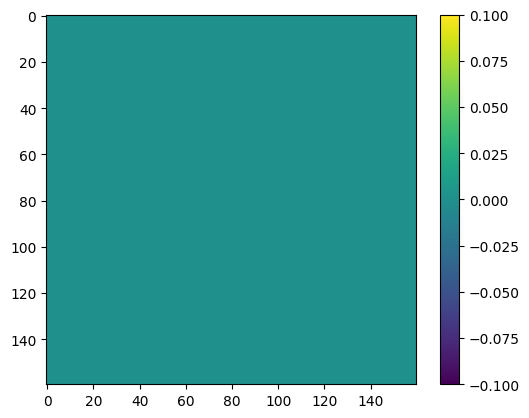

In [4]:
from OOPAO.Telescope import Telescope

sensing_wavelength = lgsAst.src[0].wavelength      # sensing wavelength of the WFS, read from the ngs object
n_subaperture      = config_vars["nSubaperture"]                  # number of subaperture across the diameter
diameter           = config_vars["diameter"]                   # diameter of the support of the phase screens in [m]
resolution         = config_vars["resolution"]     # resolution of the phase screens in pixels
# pixel_size         = diameter/resolution # size of the pixels in [m]
obs_ratio          = config_vars["centralObstruction"]                 # central obstruction in fraction of the telescope diameter
sampling_time      = config_vars["samplingTime"]             # sampling time of the AO loop in [s]
fieldOfViewInArcsec = config_vars["fieldOfViewInArcsec"]




# initialize the telescope object
tel_ast = Telescope(diameter          = diameter,
               resolution         = resolution,
               centralObstruction = obs_ratio,
               samplingTime       = sampling_time,
               fov                = fieldOfViewInArcsec)




sensing_wavelength = ngs.wavelength      # sensing wavelength of the WFS, read from the ngs object
n_subaperture      = config_vars["nSubaperture"]                  # number of subaperture across the diameter
diameter           = config_vars["diameter"]                   # diameter of the support of the phase screens in [m]
resolution         = config_vars["resolution"]     # resolution of the phase screens in pixels
# pixel_size         = diameter/resolution # size of the pixels in [m]
obs_ratio          = config_vars["centralObstruction"]                 # central obstruction in fraction of the telescope diameter
sampling_time      = config_vars["samplingTime"]             # sampling time of the AO loop in [s]
fieldOfViewInArcsec = config_vars["fieldOfViewInArcsec"]


# initialize the telescope object
tel_single = Telescope(diameter          = diameter,
               resolution         = resolution,
               centralObstruction = obs_ratio,
               samplingTime       = sampling_time)






plt.imshow(tel_ast.pupil^tel_single.pupil)
plt.colorbar()



lgsAst**tel_ast
ngs**tel_single



In [5]:
from OOPAO.Atmosphere import Atmosphere

r0 = config_vars["r0"]
L0 = config_vars["L0"]

fractionnalR0 = config_vars["fractionnalR0"]
windSpeed = config_vars["windSpeed"]
windDirection = config_vars["windDirection"]
altitude = config_vars["altitude"]



atm_ast = Atmosphere(telescope      = tel_ast,
                 r0             = r0,
                 L0             = L0,
                 fractionalR0   = fractionnalR0,
                 altitude       = altitude,
                 windDirection  = windDirection,
                 windSpeed      = windSpeed)





atm_single = Atmosphere(telescope      = tel_single,
                 r0             = r0,
                 L0             = L0,
                 fractionalR0   = fractionnalR0,
                 altitude       = altitude,
                 windDirection  = windDirection,
                 windSpeed      = windSpeed)





Creation of layer1/1 ...
0
-> Computing the initial phase screen...
initial phase screen : 0.012729406356811523 s
ZZt.. : 1.076237678527832 s
ZXt.. : 0.3087174892425537 s
XXt.. : 0.1132662296295166 s
Done!
Updating the Atmosphere covariance matrices...

------------------------ Atmosphere -------------------------
 Layer | Direction | Speed | Altitude | Frac Cn² | Diameter |
       |    [°]    | [m/s] |   [m]    |   [%]    |   [m]    |
   1   |    45     |  5.0  |  0e+00   |   100    |  8.200   |
r0 @ 500 nm [m] |   0.16   
L0 [m]          |   50.0   
Tau0 [s]        |  0.0099  
V0 [m/s]        |   5.00   
Frequency [Hz]  |  1000.0  
-------------------------------------------------------------

Creation of layer1/1 ...
-> Computing the initial phase screen...
initial phase screen : 0.013991117477416992 s
ZZt.. : 1.0298173427581787 s
ZXt.. : 0.2959296703338623 s
XXt.. : 0.14820408821105957 s
Done!
Updating the Atmosphere covariance matrices...

------------------------ Atmosphere -----

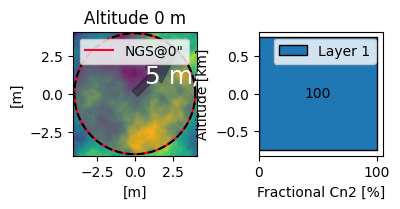

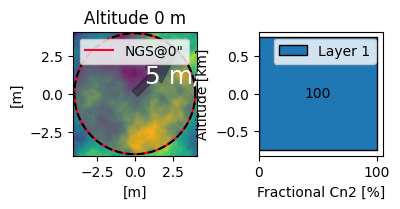

In [6]:
atm_ast.initializeAtmosphere(telescope=tel_ast)
atm_single.initializeAtmosphere(telescope=tel_single)

atm_ast.display_atm_layers()
atm_single.display_atm_layers()

In [7]:
tel_ast+atm_ast
tel_single+atm_single

In [ ]:
from OOPAO.ShackHartmann import ShackHartmann

shwfs_ast = ShackHartmann(telescope      = tel_ast,
                      src                = lgsAst,
                      nSubap             = n_subaperture,
                      lightRatio         = 0.5,
                      is_geometric       = True,
                      shannon_sampling   = True,
                      threshold_cog      = 0.1)


shwfs_single = ShackHartmann(telescope   = tel_single,
                      src                = ngs,
                      nSubap             = n_subaperture,
                      lightRatio         = 0.5,
                      is_geometric       = True,
                      shannon_sampling   = True,
                      threshold_cog      = 0.1)



No user-input pixel scale - using shannon_sampling input value:2 pixel(s) per spot FWHM
-------------Detector--------------
Sensor type              |   CCD   
Resolution [px]          |   160   
Gain                     |    1    
Quantum efficiency [%]   |   100   
Binning                  |   1x1   
Dark current [e-/px/s]   |  0.00   
Photon noise             |  False  
Bkg noise [e-]           |  False  
Readout noise [e-/px]    |   0.0   
-----------------------------------

Selecting valid subapertures based on flux considerations..
Acquiring reference slopes..
updating the flux of the SHWFS object
Done!
Recalibrating the slopes units
Acquiring reference slopes..
Done!
Done
OOPAO Warning: 
All Detector Noises are disables with the geometric WFS

------- Shack-Hartmann WFS --------
Subapertures [lenslets]  |   20    
Subaperture Pitch [m]    |  0.40   
Subaperture FoV [arcsec] |  1.21   
Pixel Scale [arcsec]     |  0.152  
Valid Subapertures       |   624   
Spot Sampling [pix]   

Iter: 0
ngs OPD mean: -1.6080090300384717e-07, lgsAst OPD mean: -1.6080090300384717e-07
ngs signal mean: 0.3202299113775821, lgsAst signal mean: 0.3202299113775821


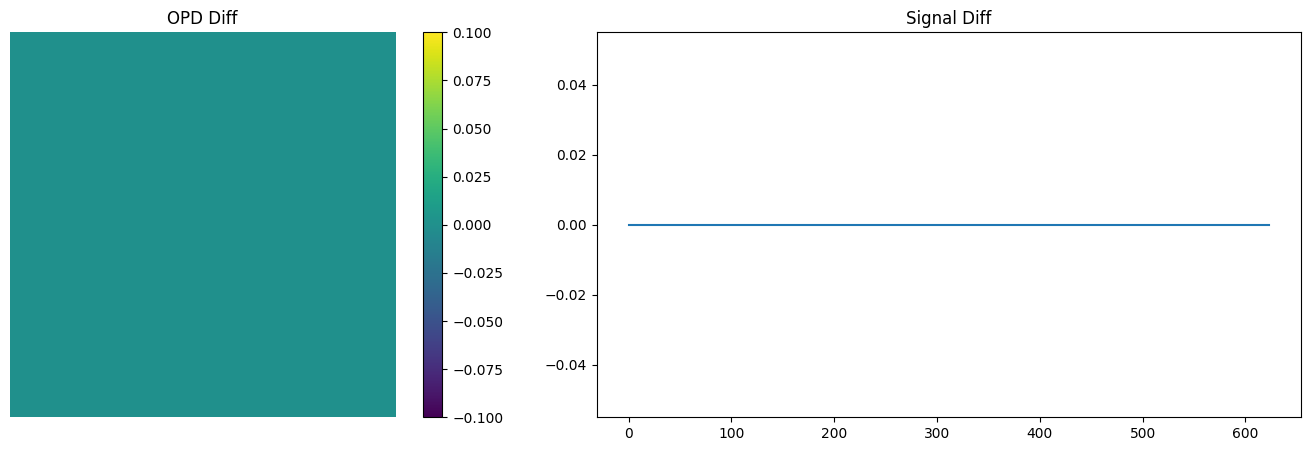

Iter: 10
ngs OPD mean: -1.737329469356947e-07, lgsAst OPD mean: -1.737329469356947e-07
ngs signal mean: 0.3229890674402387, lgsAst signal mean: 0.3229890674402387


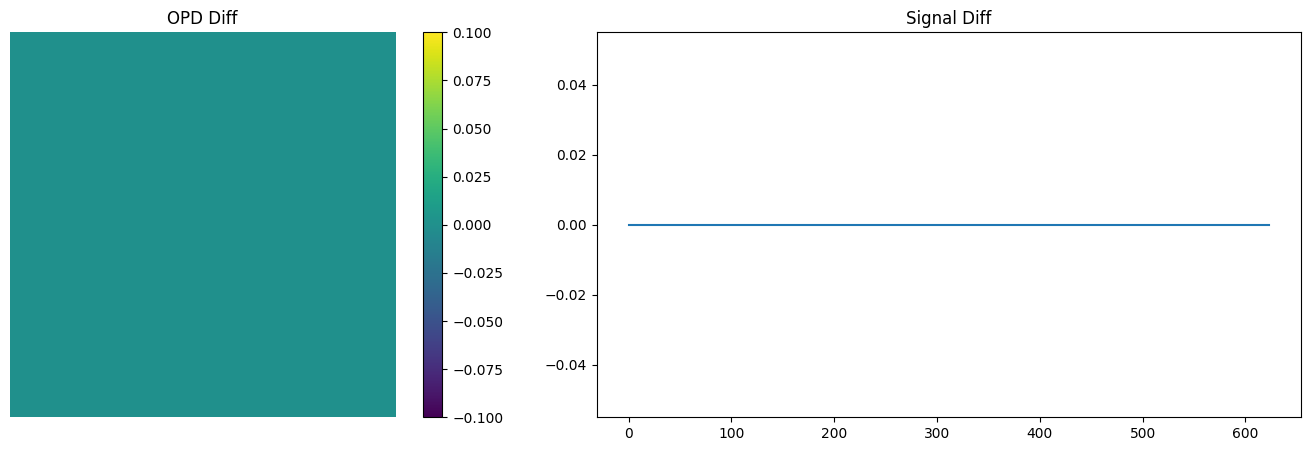

Iter: 20
ngs OPD mean: -1.867240694650932e-07, lgsAst OPD mean: -1.867240694650932e-07
ngs signal mean: 0.32580722667178663, lgsAst signal mean: 0.32580722667178663


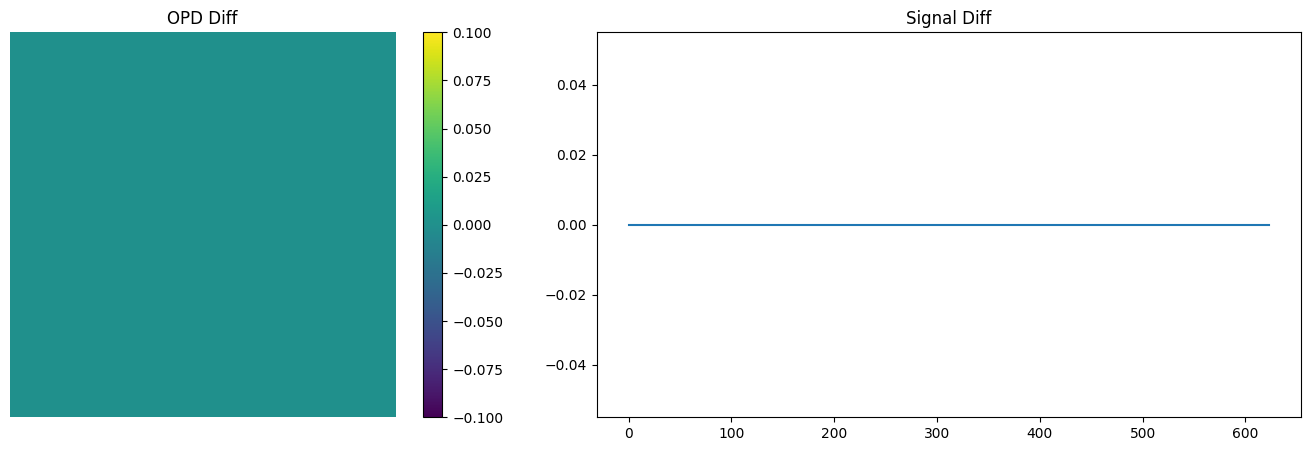

Iter: 30
ngs OPD mean: -1.9972001972874075e-07, lgsAst OPD mean: -1.9972001972874075e-07
ngs signal mean: 0.32715922092719135, lgsAst signal mean: 0.32715922092719135


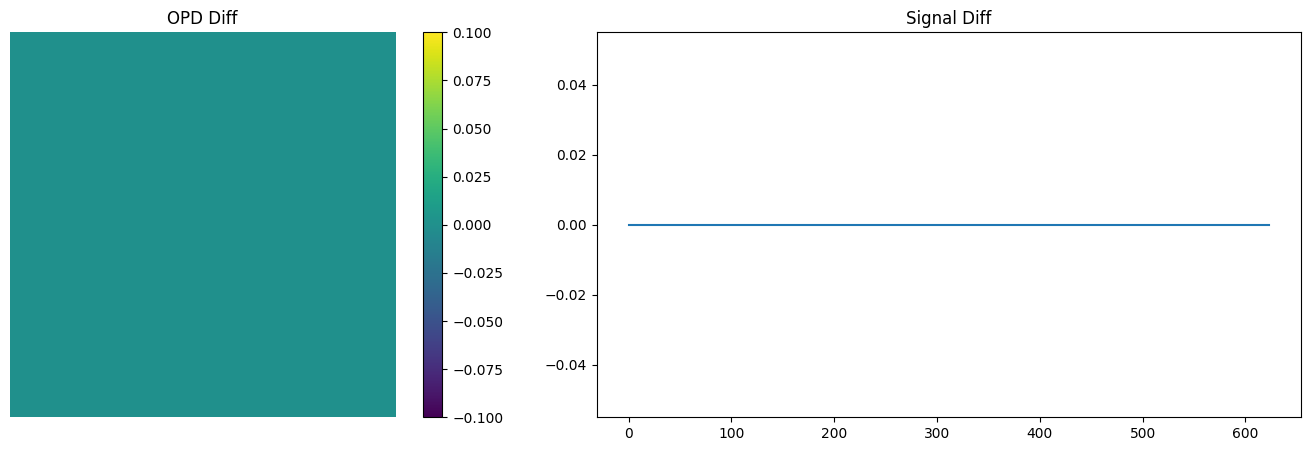

Iter: 40
ngs OPD mean: -2.1280198394110426e-07, lgsAst OPD mean: -2.1280198394110426e-07
ngs signal mean: 0.32761229141603393, lgsAst signal mean: 0.32761229141603393


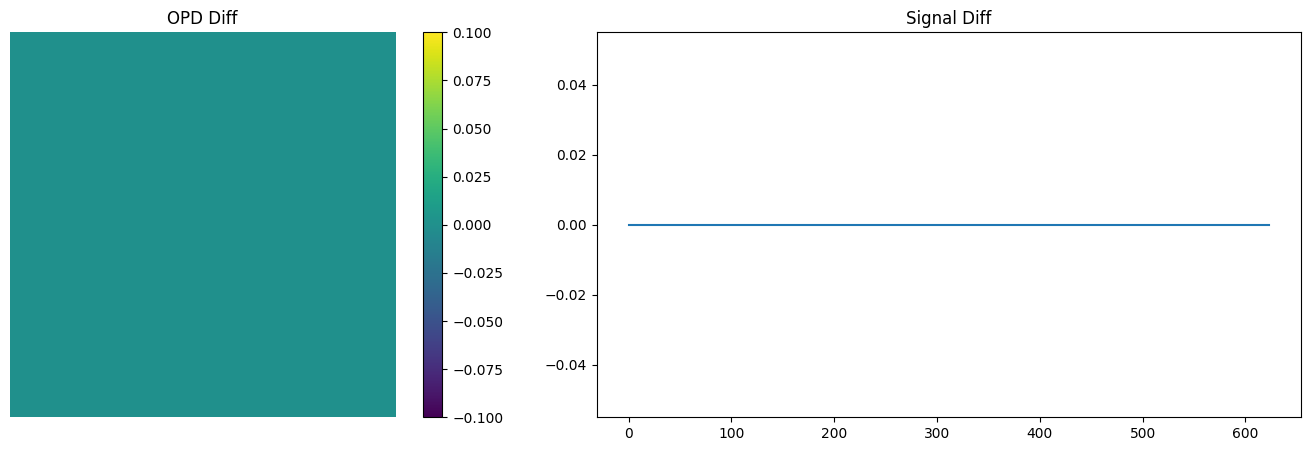

In [19]:
n_iter = 50

for i in range(n_iter):
    atm_single.update()
    atm_ast.update()
    
    lgsAst**tel_ast*shwfs_ast
    ngs**tel_single*shwfs_single

    if i%10 == 0:

        print(f"Iter: {i}")
        print(f"ngs OPD mean: {np.mean(ngs.OPD)}, lgsAst OPD mean: {np.mean(lgsAst.OPD[0])}")
        print(f"ngs signal mean: {np.mean(shwfs_single.signal)}, lgsAst signal mean: {np.mean(shwfs_ast.signal[0])}")

        fig, axes = plt.subplots(1, 2, figsize=(20, 5))

        im = axes[0].imshow(ngs.OPD - lgsAst.OPD[0])
        axes[0].axis('off')
        axes[0].set_title(f'OPD Diff')
        fig.colorbar(im, ax=axes[0], fraction=0.046, pad=0.04)

        axes[1].plot(shwfs_single.signal - shwfs_ast.signal[0])
        axes[1].set_title(f'Signal Diff')




        plt.show()
            